In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os

from create_input.lmp.info_from_lmp_out import LammpsLogParser
from scf.qelattice import get_qel
from mlptools.utils.constants import ZERO_POINT_ENERGY

from mlptools.io.read import read_from_format

In [34]:
def get_two_body_result(path2root):
    pathes = glob(f'{path2root}/tb*')
    pathes.sort()
    result = []
    for path in pathes:
        try:
            r_from_path = float(path.split('/')[-1].split('_')[-1])
            obj = LammpsLogParser(path2target=path, dump_filename='dump.out')
            energy = obj.get_energy()
            result.append([r_from_path, energy])
        except:
            print(path)
            continue
    return np.array(result)

def plot_two_body(result, label, ax, color=None):
    # ax.plot(result[:,0], result[:,1], label=label, lw=2, marker='o')
    if color is None:
        ax.plot(result[:,0], result[:,1], label=label, lw=2, marker='o', markersize=2)
    else:
        ax.plot(result[:,0], result[:,1], label=label, lw=2, marker='o', markersize=2, color=color)

In [35]:
# result = []
# for r, path in zip(interatomic_distance_range, pathes):
#     r_from_path = float(path.split('/')[-1].split('_')[-1])
#     if r == r_from_path:
#         obj = LammpsLogParser(path2target=path, dump_filename='dump.out')
#         energy = obj.get_energy()
#         result.append([r, energy])
#     else:
#         raise ValueError('not consistent')
path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model23'
result = get_two_body_result(path2root)
result = np.array(result)
result[:, 1] = result[:, 1] + np.abs(result[-1][-1])

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_98541/2094507082.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


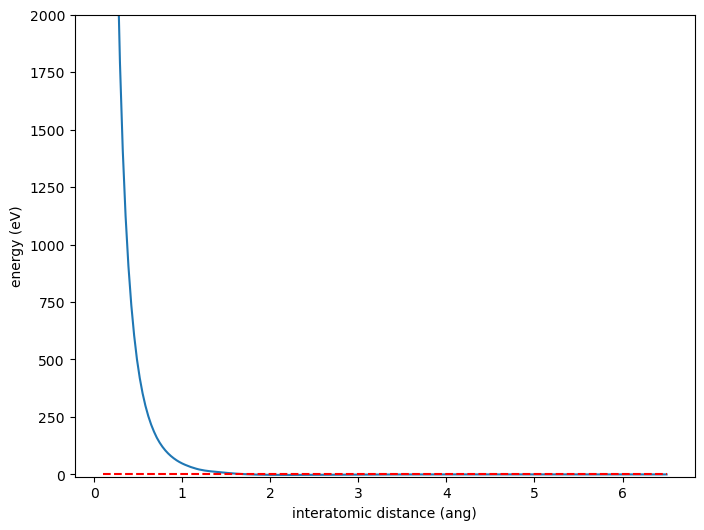

In [36]:
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot(111)

ax.plot(result[:,0], result[:,1])
ax.plot(result[:,0], np.zeros(len(result)), 'red', linestyle='dashed')
ax.set_xlabel('interatomic distance (ang)')
ax.set_ylabel('energy (eV)')

ax.set_ylim(-10, 2000)

fig.show()

In [52]:
path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml-zbl/model_2'
result_ml_minus_zbl = get_two_body_result(path2root)
result_ml_minus_zbl[:, 1] = result_ml_minus_zbl[:,1] - 2 * ZERO_POINT_ENERGY

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml-zbl/model_18'
result_ml_zbl = get_two_body_result(path2root)
result_ml_zbl[:, 1] = result_ml_zbl[:,1] - 2 * ZERO_POINT_ENERGY

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml-zbl/model_18_1'
result_ml_zbl_1 = get_two_body_result(path2root)
result_ml_zbl_1[:, 1] = result_ml_zbl_1[:,1] - 2 * ZERO_POINT_ENERGY

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml-zbl/model_18_2'
result_ml_zbl_2 = get_two_body_result(path2root)
result_ml_zbl_2[:, 1] = result_ml_zbl_2[:,1] - 2 * ZERO_POINT_ENERGY

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml-zbl/model_16'
result_ml_zbl_16 = get_two_body_result(path2root)
result_ml_zbl_16[:, 1] = result_ml_zbl_16[:,1] + np.abs(result_ml_zbl_16[-1][-1])

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml-ga/model_10'
result_ml_ga = get_two_body_result(path2root)
result_ml_ga[:, 1] = result_ml_ga[:,1] + 1.2638900e+03

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml-zbl-modified'
result_ml_zbl_mod = get_two_body_result(path2root)
result_ml_zbl_mod[:, 1] = result_ml_zbl_mod[:,1] + 1264.7168

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml/model_16'
result_ml_16 = get_two_body_result(path2root)
result_ml_16[:, 1] = result_ml_16[:,1] + np.abs(result_ml_16[-1][-1])

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml/model_18'
result_ml = get_two_body_result(path2root)
result_ml[:, 1] = result_ml[:,1] - 2 * ZERO_POINT_ENERGY

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/sw'
result_sw = get_two_body_result(path2root)

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/tersoff'
result_tersoff = get_two_body_result(path2root)

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/zbl/1.2'
result_zbl = get_two_body_result(path2root)

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/zbl/1.3'
result_zbl_ = get_two_body_result(path2root)
# result_zbl_[:, 1] = result_zbl_[:, 1] - 1260.14108

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model15'
result_dp = get_two_body_result(path2root)
result_dp[:, 1] = result_dp[:, 1] + np.abs(result_dp[-1][-1])

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model19'
result_dp19 = get_two_body_result(path2root)
result_dp19[:, 1] = result_dp19[:, 1] + np.abs(result_dp19[-1][-1])

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model22'
result_dp22 = get_two_body_result(path2root)
result_dp22[:, 1] = result_dp22[:, 1] + np.abs(result_dp22[-1][-1])

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model23'
result_dp23 = get_two_body_result(path2root)
result_dp23[:, 1] = result_dp23[:, 1] + 1260.14108

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model24'
result_dp24 = get_two_body_result(path2root)
# result_dp24[:, 1] = result_dp24[:, 1] + np.abs(result_dp24[-1][-1])
result_dp24[:, 1] = result_dp24[:, 1] +  1260.14108

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model25'
result_dp25 = get_two_body_result(path2root)
result_dp25[:, 1] = result_dp25[:, 1] +  1260.14108

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model26'
result_dp26 = get_two_body_result(path2root)
result_dp26[:, 1] = result_dp26[:, 1] +  1260.14108

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model27'
result_dp27 = get_two_body_result(path2root)
result_dp27[:, 1] = result_dp27[:, 1] +  1260.14108

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model31'
result_dp31 = get_two_body_result(path2root)
result_dp31[:, 1] = result_dp31[:, 1] - 2 * ZERO_POINT_ENERGY

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model32'
result_dp32 = get_two_body_result(path2root)
result_dp32[:, 1] = result_dp32[:, 1] - 2 * ZERO_POINT_ENERGY

/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model19/tb_0.1
/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model19/tb_0.132
/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model22/tb_0.1
/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model22/tb_0.132
/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model24/tb_0.164
/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model24/tb_0.486
/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model24/tb_0.615
/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model24/tb_0.647
/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model24/tb_0.679
/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model24/tb_1.065
/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model24/tb_1.419
/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potent

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_98541/515561622.py:115: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


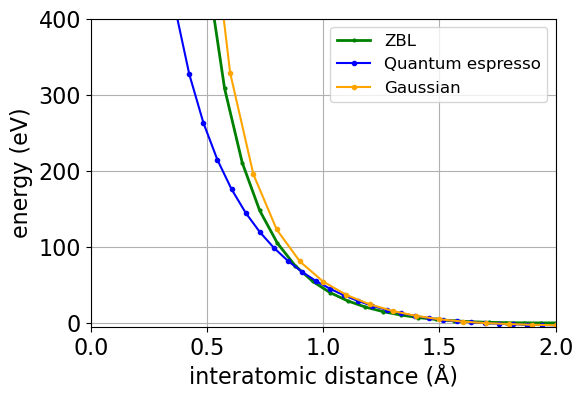

In [62]:
fs = 16

fig = plt.figure(figsize=(6,4))
fig.set_facecolor('white')
ax = fig.add_subplot(111)



# plot_two_body(result_sw, label='SW', ax=ax)
# plot_two_body(result_tersoff, label='Tersoff', ax=ax)

# plot_two_body(result_ml_minus_zbl, label='Our method #1', ax=ax)

# plot_two_body(result_ml_zbl, label='ML+ZBL (cutoff_zbl=1.4)', ax=ax)
# plot_two_body(result_ml_zbl_1, label='ML+ZBL (cutoff_zbl=1.2)', ax=ax)

# plot_two_body(result_ml_zbl_2, label="Our method #2", ax=ax)
# plot_two_body(result_ml_zbl_2, label="ML", ax=ax)

# plot_two_body(result_ml_zbl_16, label='ML+ZBL ', ax=ax)
# plot_two_body(result_ml_ga, label='ML+Gaussian(fit)', ax=ax)
# plot_two_body(result_ml_zbl_mod, label='ML+ZBL modified', ax=ax)
# plot_two_body(result_ml_15, label='ML', ax=ax)

# plot_two_body(result_ml, label='Our method #2 only ML', ax=ax)
# plot_two_body(result_zbl_, label='ZBL', ax=ax)
plot_two_body(result_zbl, label='ZBL', ax=ax, color='green')

# plot_two_body(result_ml_16, label='ML (model16)', ax=ax)
# plot_two_body(result_ml_11, label='ML model11', ax=ax)

# plot_two_body(result_ml_zbl_2, label='ML+ZBL(model_2)', ax=ax)
# ax.plot(result_ml_zbl[:,0], np.zeros(len(result_ml_zbl)), 'red', linestyle='dashed')
# plot_two_body(result_dp, label='DP-ZBL15', ax=ax)

# plot_two_body(result_dp19, label='DP-ZBL19', ax=ax)
# plot_two_body(result_dp23, label='DP-ZBL23', ax=ax)

# plot_two_body(result_dp24, label='DP-ZBL model24', ax=ax)
# plot_two_body(result_dp23, label='DP-ZBL model23', ax=ax)
# plot_two_body(result_dp25, label='DP-ZBL model25', ax=ax)
# plot_two_body(result_dp26, label='DP-ZBL (without artificial data)', ax=ax)
# plot_two_body(result_dp27, label='DP-ZBL', ax=ax)

# plot_two_body(result_dp32, label="DP-ZBL", ax=ax)

# plot_two_body(result_dp23, label='DP-ZBL', ax=ax)

def get_dimer_result(path2target):
    dirs = glob(f'{path2target}/scf*')
    result = []
    for d in dirs:
        try:
            qel = get_qel(d)
            coord = qel.get_coord()
            vol = qel.get_vol()
            dist = np.linalg.norm(coord[0]-coord[1])
            result.append([vol, dist, qel.get_energy(), d.split('/')[-1]])
        except Exception as e:
            continue
            # print(d, e)
            
    return pd.DataFrame(data=result, columns=['vol', 'distance', 'energy', 'path'])

# path2target = '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result'
# result_qe = get_dimer_result(path2target)
# result_qe = result_qe.sort_values(by='distance')
# result_qe.to_csv(os.path.join(path2target, 'qe.csv'))
# ax.plot(result_qe['distance'], result_qe['energy'] - 2 * ZERO_POINT_ENERGY, label='Quantum espresso (nspin=1)', marker='o', markersize=3)

# path2target = '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/04/result'
# result_qe2 = get_dimer_result(path2target)
# result_qe2 = result_qe2.sort_values(by='distance')
# ax.plot(result_qe2['distance'], result_qe2['energy'] - ZERO_POINT_ENERGY, label='Quantum espresso2', marker='o')

path2target = '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result'
result_qe_spin = get_dimer_result(path2target)
result_qe_spin = result_qe_spin.sort_values(by='distance')
result_qe_spin.to_csv(os.path.join(path2target, 'qe.csv'))
ax.plot(result_qe_spin['distance'], result_qe_spin['energy'] - 2 * ZERO_POINT_ENERGY, label='Quantum espresso', marker='o', markersize=3, color='blue')

# plot_two_body(result_zbl_, label='ZBL', ax=ax)
# path2target = '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/05/result'
# result_qe3 = get_dimer_result(path2target)
# result_qe3 = result_qe3.sort_values(by='distance')
# ax.plot(result_qe3['distance'], result_qe3['energy']+1260.14108, label='Quantum espresso3')

# path2target = '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/06/result'
# result_qe4 = get_dimer_result(path2target)
# result_qe4 = result_qe4.sort_values(by='distance')
# ax.plot(result_qe4['distance'], result_qe4['energy']+1260.14108, label='Quantum espresso4', marker='o')

# Gaussian
hartree2ev = 27.2114
ga_df = pd.read_csv('/Users/y1u0d2/desktop/Lab/result/gaussian/Si/distance_and_energy.csv')

ax.plot(ga_df['distance'], ga_df['energy'] + 15740.401162, label='Gaussian', marker='o', markersize=3, color='orange')


# ax.plot(np.linspace(0, 6, 10), np.full(10, -2.2548*2))

# ax.set_title('Comparison of potentials', fontsize=fs)
ax.set_xlabel('interatomic distance (Å)', fontsize=fs)
ax.set_ylabel('energy (eV)', fontsize=fs)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.grid()
ax.legend(fontsize=12)

# ax.set_ylim(-5, 500)
ax.set_ylim(-5 , 400)
# ax.set_xlim(0., 6.0)
ax.set_xlim(0., 2.0)

fig.show()

In [39]:
result_qe = result_qe.sort_values(by='distance').reset_index(drop=True)
result_qe['shifted_energy'] = result_qe['energy']+1260.14108

NameError: name 'result_qe' is not defined

In [ ]:
interpolate_qe = result_qe.query('distance > 2.31')[['distance', 'shifted_energy']].values
convergence_term = np.vstack([np.linspace(6, 6.1, 3), np.zeros(3)]).T
# artificial_data = np.array(
#     [
#         [ 4.5    , -0.89476],
#         [ 4.6    , -0.85217],
#         [ 4.7    , -0.81307],
#         [ 4.8    , -0.77728],
#         [ 4.9    , -0.74461],
#         [ 5.     , -0.71481],
#         [ 5.1    , -0.6876 ],
#         [ 5.2    , -0.66281],
#         [ 5.3    , -0.64036],
#         [ 5.4    , -0.62011],
#         [ 5.5    , -0.60184],
#         [ 5.6    , -0.58528],
#         [ 5.7    , -0.57024],
#         [ 5.8    , -0.5566 ],
#     ]
# )
artificial_data = np.array([
    [5.0, -0.45],
    [5.25, -0.27],
    [5.5, -0.15],
    [5.8, -0.05],
    [6.0, 0]
])
interpolate_qe = np.concatenate((interpolate_qe, artificial_data), axis=0)

In [ ]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(interpolate_qe[:, 0], interpolate_qe[:, 1])

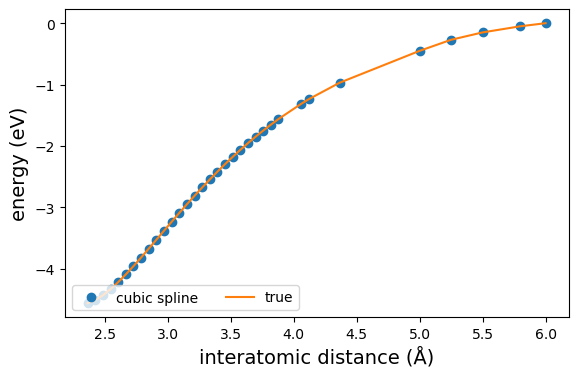

In [ ]:
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(interpolate_qe[:, 0], cs(interpolate_qe[:, 0]), 'o', label='cubic spline')
# ax.plot(interpolate_qe[:, 0], cs(interpolate_qe[:, 0], 1), 'o', label='cubic spline1')
ax.plot(interpolate_qe[:, 0],interpolate_qe[:, 1], label='true')
ax.legend(loc='lower left', ncol=2)
ax.set_xlabel('interatomic distance (Å)', fontsize=fs)
ax.set_ylabel('energy (eV)', fontsize=fs)
plt.show()

In [ ]:
print(interpolate_qe[:, 0][-5:])
cs(interpolate_qe[:, 0], 1)[-5:]

[5.   5.25 5.5  5.8  6.  ]


array([0.76309001, 0.61191261, 0.38925955, 0.28096285, 0.22061748])

In [ ]:
zbl_df = pd.DataFrame(data=result_zbl_, columns=['distance', 'energy'])

In [ ]:
zbl_df['shifted_energy'] = zbl_df['energy'] + 2 * ZERO_POINT_ENERGY

In [ ]:
for distance, energy in zbl_df.query('distance < 2.5')[['distance', 'shifted_energy']].values:
    print(distance, round(energy, 4))

0.1 12476.522
0.11 10525.205
0.12 8950.043
0.13 7658.6805
0.14 6586.0051
0.15 5684.9029
0.16 4920.5196
0.17 4266.5685
0.18 3702.8858
0.19 3213.7711
0.2 2786.8354
0.21 2412.185
0.221 2050.9726
0.231 1761.8761
0.241 1504.7314
0.251 1275.1803
0.261 1069.5798
0.271 884.8649
0.281 718.4407
0.291 568.098
0.301 431.946
0.311 308.3586
0.321 195.9311
0.331 93.445
0.341 -0.1608
0.351 -85.8135
0.361 -164.3262
0.371 -236.4144
0.381 -302.7091
0.391 -363.7686
0.401 -420.0884
0.411 -472.1087
0.421 -520.2222
0.431 -564.7797
0.441 -606.095
0.451 -644.45
0.462 -683.5224
0.472 -716.4544
0.482 -747.1321
0.492 -775.7392
0.502 -802.4424
0.512 -827.3924
0.522 -850.7262
0.532 -872.5684
0.542 -893.0324
0.552 -912.2215
0.562 -930.2301
0.572 -947.1444
0.582 -963.0433
0.592 -977.9991
0.602 -992.0782
0.612 -1005.3415
0.622 -1017.8449
0.632 -1029.6399
0.642 -1040.774
0.652 -1051.291
0.662 -1061.2312
0.672 -1070.632
0.682 -1079.5279
0.692 -1087.9507
0.703 -1096.7048
0.713 -1104.2282
0.723 -1111.3635
0.733 -1118.1342

In [ ]:
result_qe

,vol,distance,energy,path,shifted_energy
0,3375.0,0.242430,-540.014185,scf_3,720.126895
1,3375.0,0.303030,-726.098932,scf_4,534.042148
2,3375.0,0.363630,-848.643740,scf_5,411.497340
3,3375.0,0.424245,-934.979405,scf_6,325.161675
4,3375.0,0.484845,-998.769569,scf_7,261.371511
...,...,...,...,...,...
56,3375.0,3.818175,-1261.794730,scf_62,-1.653650
57,3375.0,3.878790,-1261.703048,scf_63,-1.561968
58,3375.0,4.060605,-1261.452997,scf_66,-1.311917
59,3375.0,4.121205,-1261.377573,scf_67,-1.236493


In [ ]:
summary_df

,distance,6-31G triplet,6-311G triplet,6-311Gdp triplet,6-31G inglet,6-311G inglet,6-311Gdp inglet,6-31G,6-311G,6-311Gdp
0,0.5,-15122.77273,-15149.71507,-15150.73864,-15126.27732,-15152.32530,-15153.34612,612.735279,588.018222,-15153.34612
1,0.6,-15398.66098,-15407.55062,-15408.59667,-15402.21753,-15410.60526,-15411.63623,336.795069,329.738262,-15411.63623
2,0.7,-15535.75093,-15540.62234,-15541.63619,-15539.59398,-15544.08215,-15545.06743,199.418619,196.261372,-15545.06743
3,0.8,-15608.63621,-15612.47778,-15613.76342,-15612.71230,-15616.27596,-15617.47321,126.300299,124.067562,-15617.47321
4,0.9,-15650.77753,-15654.01974,-15655.83673,-15654.84323,-15657.94207,-15659.62895,84.169369,82.401452,-15659.62895
...,...,...,...,...,...,...,...,...,...,...
91,9.6,NaN,NaN,-15739.80886,NaN,NaN,NaN,NaN,NaN,-15739.80886
92,9.7,NaN,NaN,-15739.80873,NaN,NaN,NaN,NaN,NaN,-15739.80873
93,9.8,NaN,NaN,-15739.80863,NaN,NaN,NaN,NaN,NaN,-15739.80863
94,9.9,NaN,NaN,-15739.80854,NaN,NaN,NaN,NaN,NaN,-15739.80854


In [ ]:
all_dirs = get_silicon_all_scf_data_sd()

NameError: name 'get_silicon_all_scf_data_sd' is not defined